## EDA - 4
## Title - Spotify Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [9]:
#Q1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Check for duplicate rows
if df.duplicated().sum() > 0:
    # Remove duplicate rows
    df = df.drop_duplicates()
    # Print summary
print("Data cleaning complete.")
print(f"Final shape of the DataFrame: {df.shape}")
df.shape

Data cleaning complete.
Final shape of the DataFrame: (413, 5)


(413, 5)

In [22]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()  #check the null valuesa

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

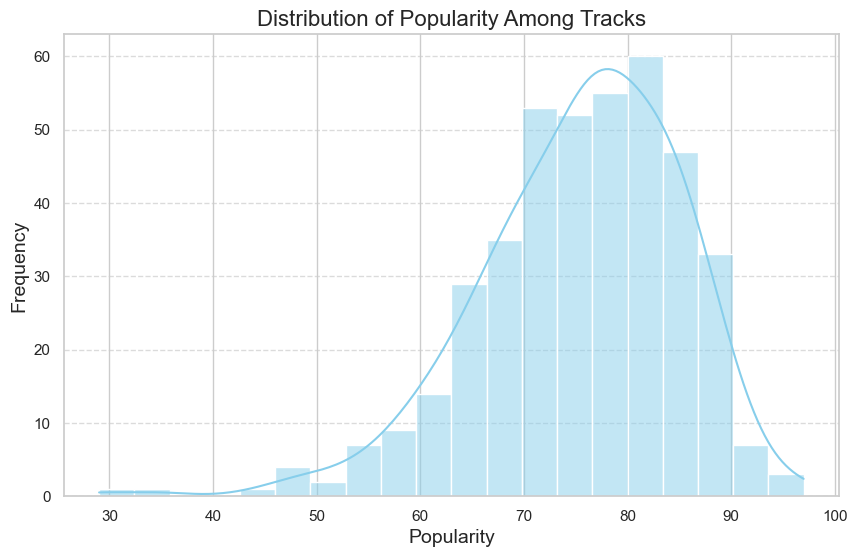

In [11]:
#Q2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

# Set plot style
sns.set(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

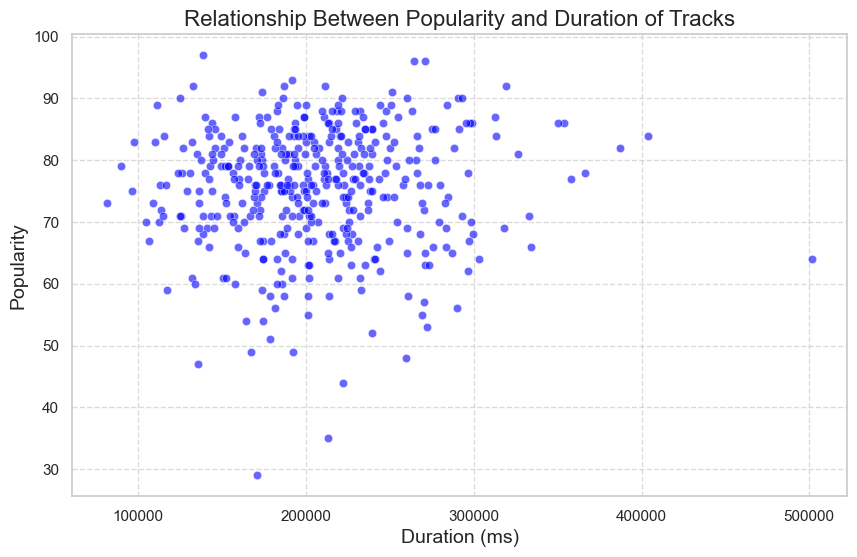

In [12]:
#Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', color='blue', alpha=0.6)

# Add plot details
plt.title('Relationship Between Popularity and Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Artist with the highest number of tracks: Drake (17 tracks)


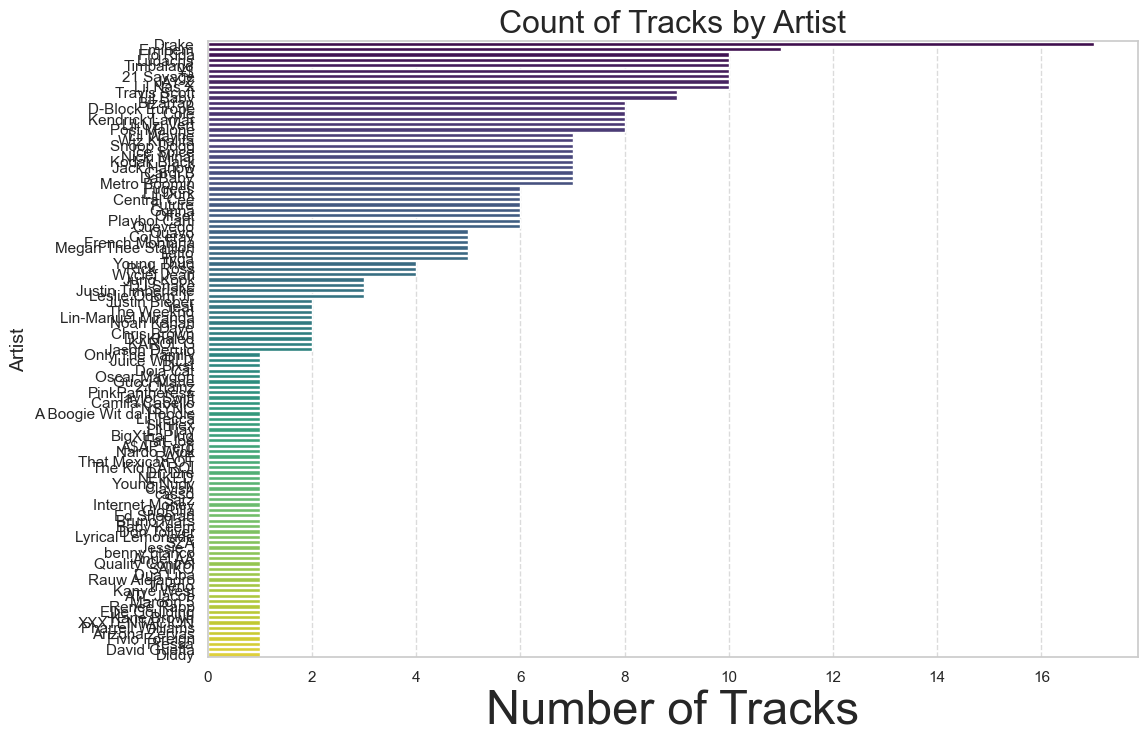

In [15]:
#Q4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
# Find the artist with the highest number of tracks
artist_track_counts = df['Artist'].value_counts()

# Display the artist with the highest number of tracks
top_artist = artist_track_counts.idxmax()
top_artist_count = artist_track_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_artist_count} tracks)")

# Visualize the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=artist_track_counts.index, palette="viridis")

# Add plot details
plt.title('Count of Tracks by Artist', fontsize=23)
plt.xlabel('Number of Tracks', fontsize=34)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [16]:
#Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
# Sort the dataset by the 'Popularity' column in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Select the artist name and track name for the least popular tracks
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


Average Popularity of Top 5 Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Artist with the highest average popularity: cassö (92.00)


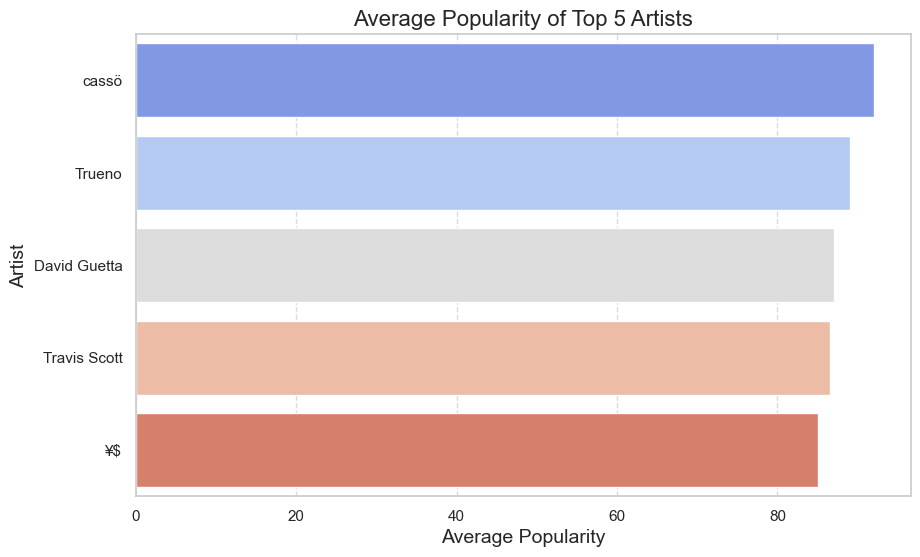

In [17]:
#Q6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# Calculate the average popularity for each artist
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 most popular artists based on average popularity
top_5_artists = artist_avg_popularity.head(5)

# Find the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()
highest_avg_popularity = top_5_artists.max()

# Display the results
print("Average Popularity of Top 5 Artists:")
print(top_5_artists)
print(f"\nArtist with the highest average popularity: {most_popular_artist} ({highest_avg_popularity:.2f})")

# Optional: Visualize the results using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_artists.values, y=top_5_artists.index, palette="coolwarm")

# Add plot details
plt.title('Average Popularity of Top 5 Artists', fontsize=16)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [18]:
#Q7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
# Identify the top 5 most popular artists based on the total popularity of their tracks
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

# Filter the dataset for tracks by the top 5 artists
top_5_artists_tracks = df[df['Artist'].isin(top_5_artists)]

# For each artist, find their most popular track
most_popular_tracks = top_5_artists_tracks.loc[top_5_artists_tracks.groupby('Artist')['Popularity'].idxmax()]

# Display the results
most_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


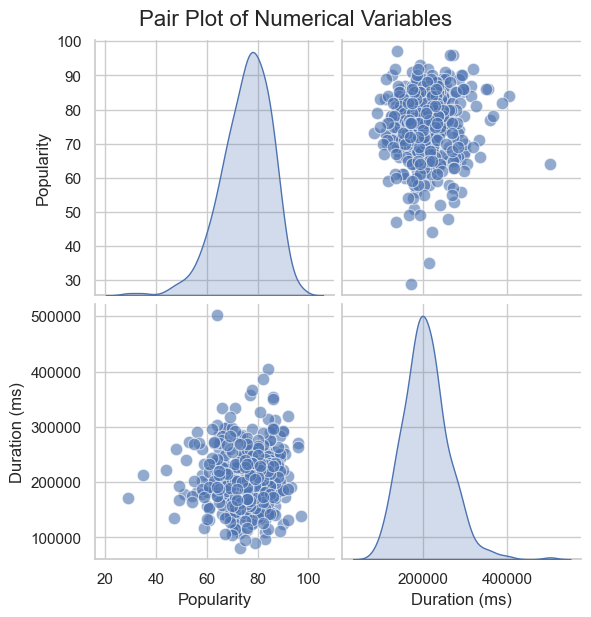

In [19]:
#Q8  Visualize relationships between multiple numerical variables simultaneously using a pair plot.
# Select numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80}, height=3)

# Add a title to the pair plot
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()

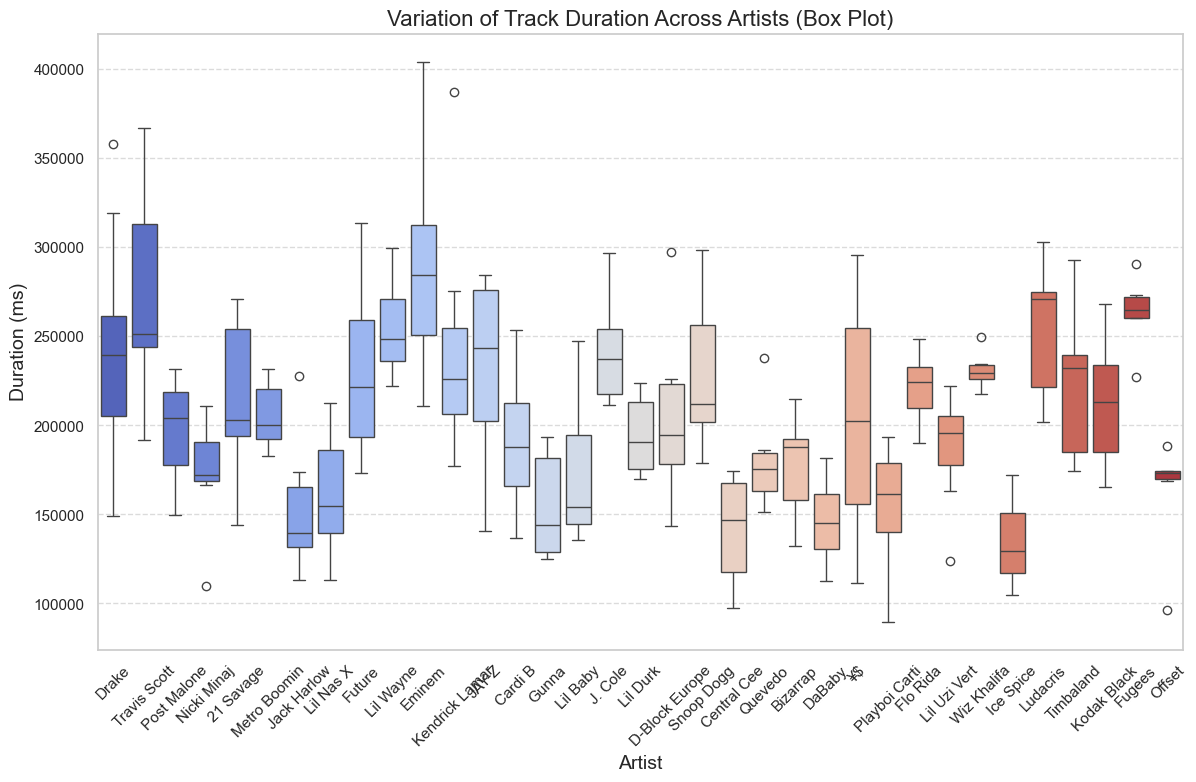

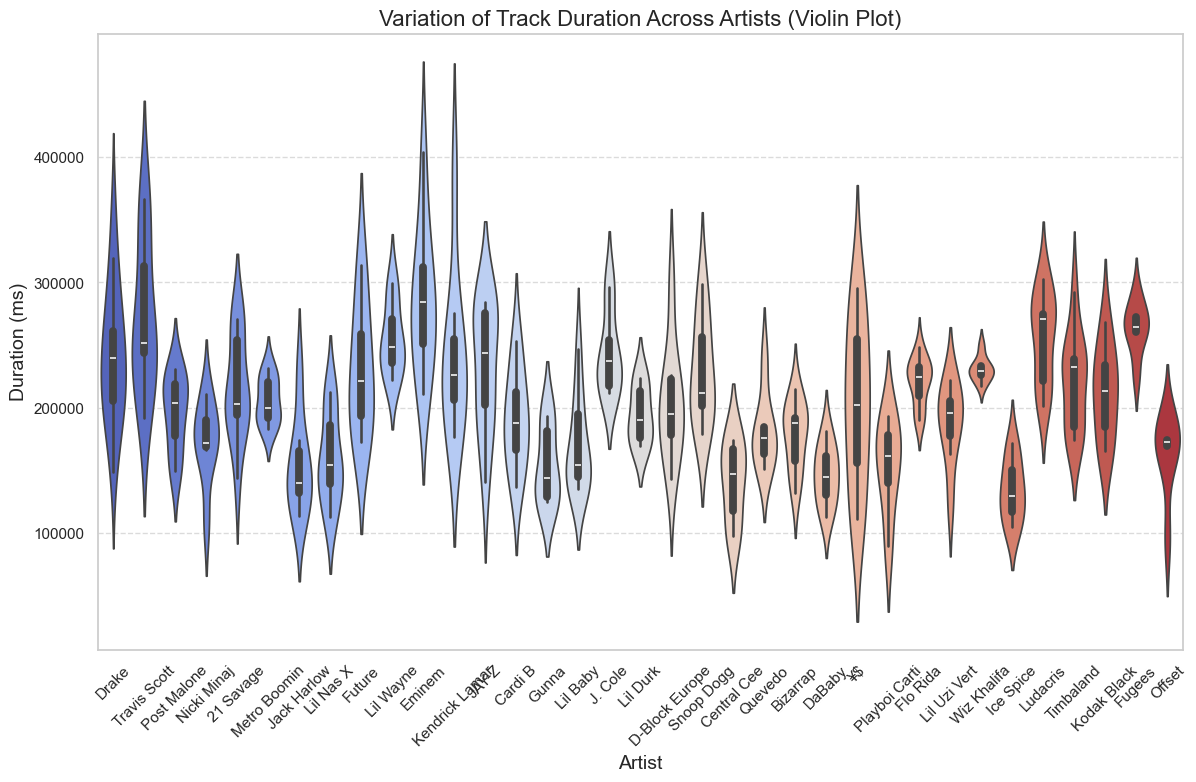

In [20]:
#Q9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# Filter dataset to include artists with more than 5 tracks for better comparison
artist_track_counts = df['Artist'].value_counts()
artists_with_enough_tracks = artist_track_counts[artist_track_counts > 5].index
filtered_df = df[df['Artist'].isin(artists_with_enough_tracks)]

# Set plot style
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='coolwarm')
plt.title('Variation of Track Duration Across Artists (Box Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='coolwarm')
plt.title('Variation of Track Duration Across Artists (Violin Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

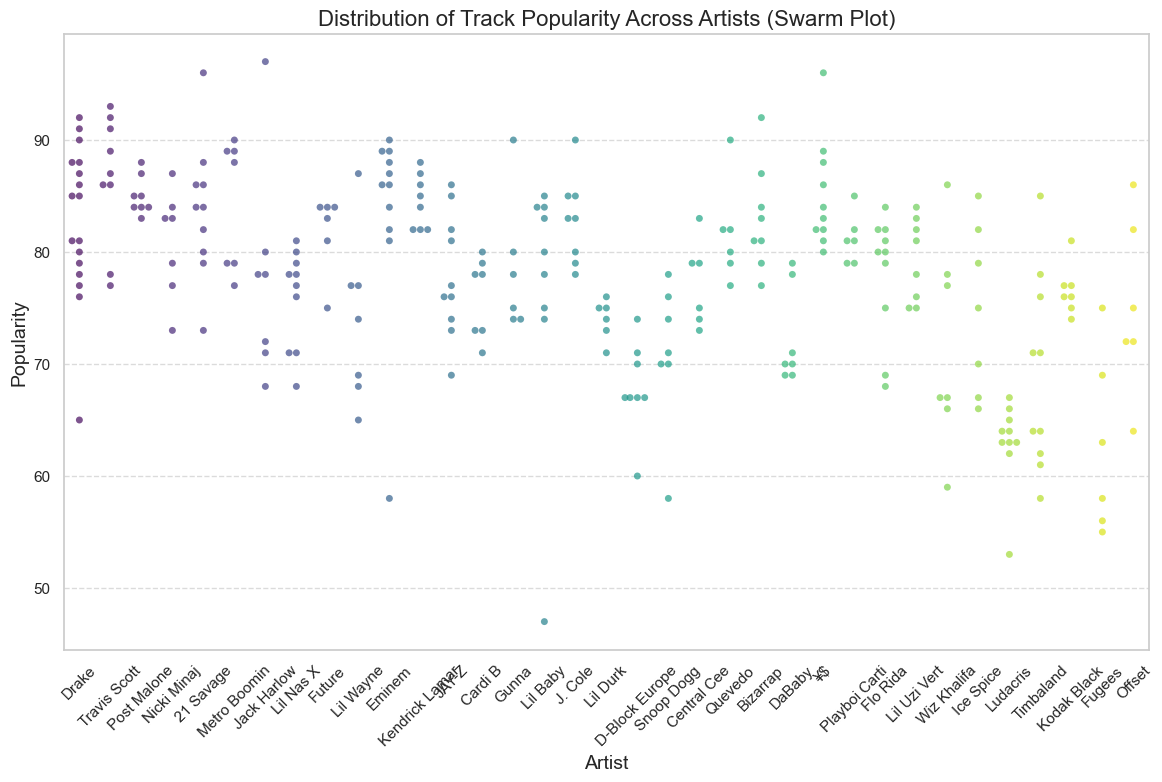

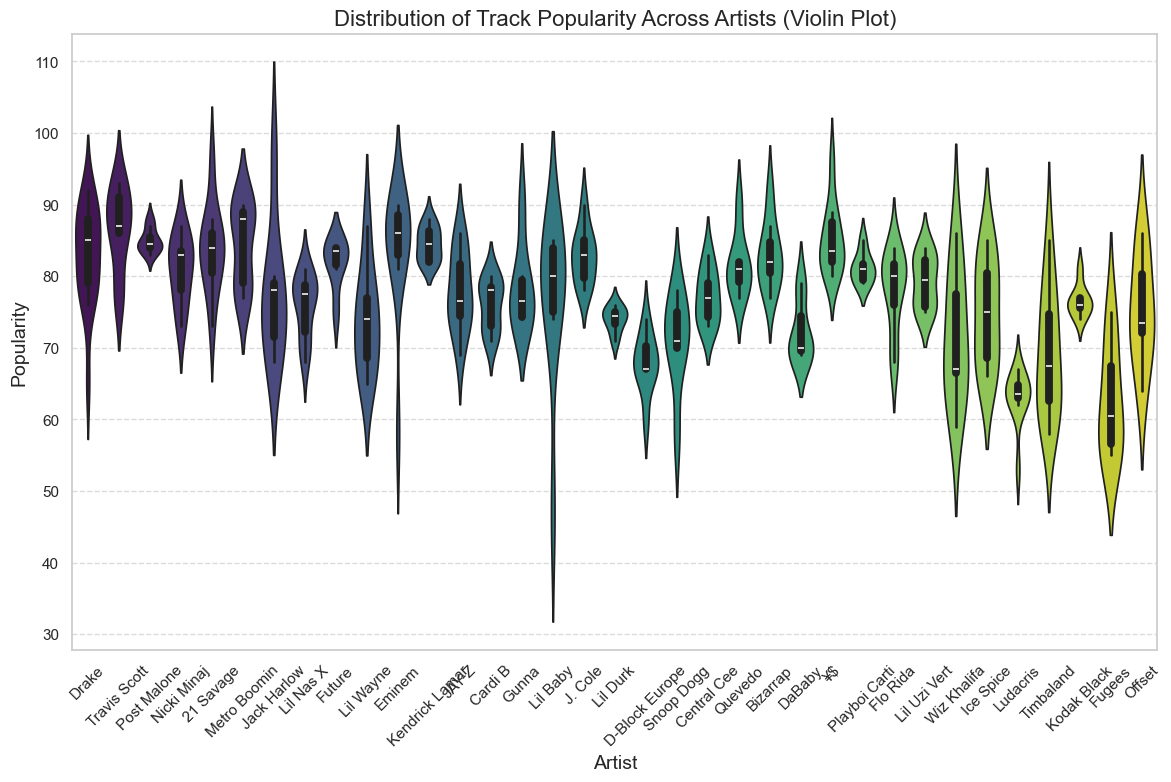

In [21]:
#Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Filter dataset to include artists with more than 5 tracks for better comparison
artist_track_counts = df['Artist'].value_counts()
artists_with_enough_tracks = artist_track_counts[artist_track_counts > 5].index
filtered_df = df[df['Artist'].isin(artists_with_enough_tracks)]

# Set plot style
sns.set(style="whitegrid")

# Create a swarm plot
plt.figure(figsize=(14, 8))
sns.swarmplot(data=filtered_df, x='Artist', y='Popularity', palette='viridis', size=5, alpha=0.7)
plt.title('Distribution of Track Popularity Across Artists (Swarm Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='viridis')
plt.title('Distribution of Track Popularity Across Artists (Violin Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()